In [1]:
# suppress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')
# for basic math operations
import numpy as np
#for dataframe manipulations
import pandas as pd
#for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
# for data analysis
import dabl

In [2]:
# import dataset
data = pd.read_csv('Mall_Customers.csv')

In [3]:
# checking the shape of the dataset
print('Shape of dataset:', data.shape)

Shape of dataset: (200, 5)


In [4]:
# check head of the data(first five rows)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# describing the data
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# gender classification and count
data.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

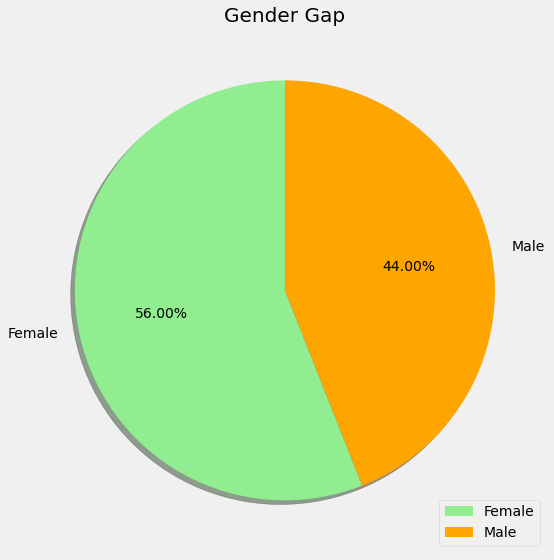

In [7]:
# gender gap
labels = ['Female', 'Male']
size = data['Gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.001]

plt.rcParams['figure.figsize'] = (9,9)
plt.pie(size, colors = colors, explode = explode, labels = labels, 
        shadow = True, startangle = 90, autopct = '%.2f%%')
plt.title('Gender Gap', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

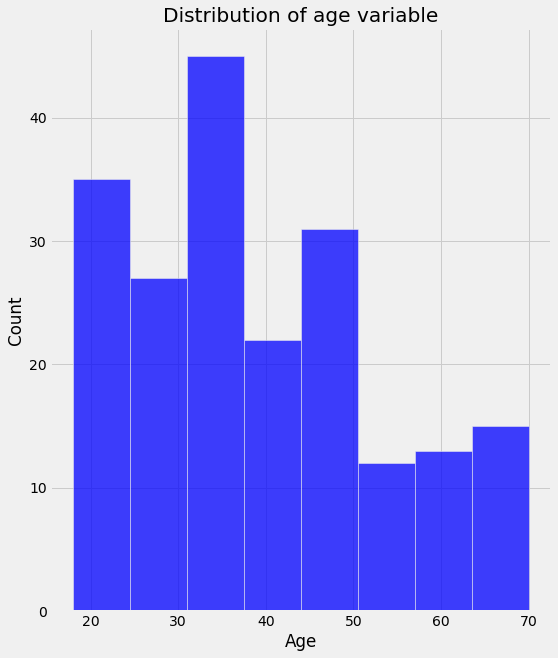

In [8]:
#distribution of age
f, ax = plt.subplots(figsize=(8,10))
ax = sns.histplot(data['Age'],bins=8,color = 'blue')
ax.set_title("Distribution of age variable")
plt.show()

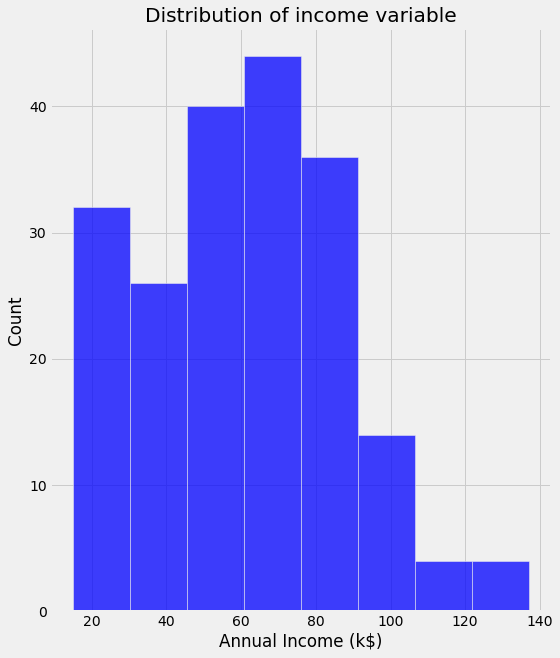

In [9]:
#distribution of income

f, ax = plt.subplots(figsize=(8,10))
ax = sns.histplot(data['Annual Income (k$)'],bins=8,color = 'blue')
ax.set_title("Distribution of income variable")
plt.show()

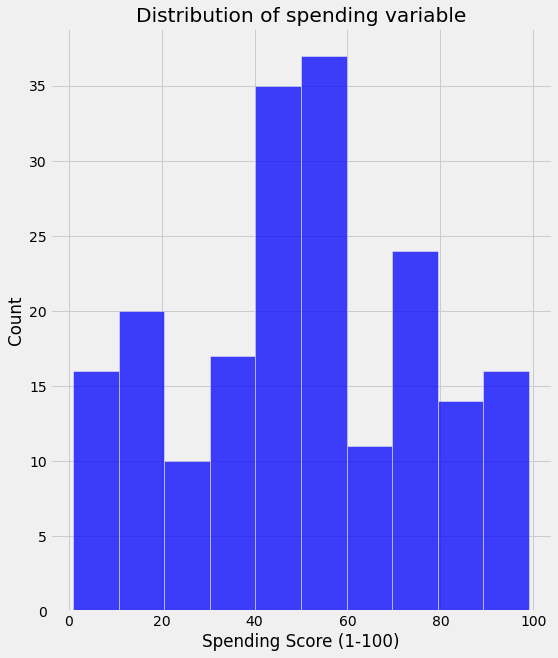

In [10]:
#distribution of spending score
f, ax = plt.subplots(figsize=(8,10))
ax = sns.histplot(data['Spending Score (1-100)'],bins=10,color = 'blue')
ax.set_title("Distribution of spending variable")
plt.show()

Target looks like regression


[array([[<AxesSubplot:title={'center':'F=2.37E+01'}, xlabel='Age', ylabel='Spending Score (1...'>,
         <AxesSubplot:title={'center':'F=1.94E-02'}, xlabel='Annual Income (k$)'>]],
       dtype=object),
 array([[<AxesSubplot:title={'center':'F=7.80E-02'}, xlabel='Spending Score (1...', ylabel='Gender'>]],
       dtype=object)]

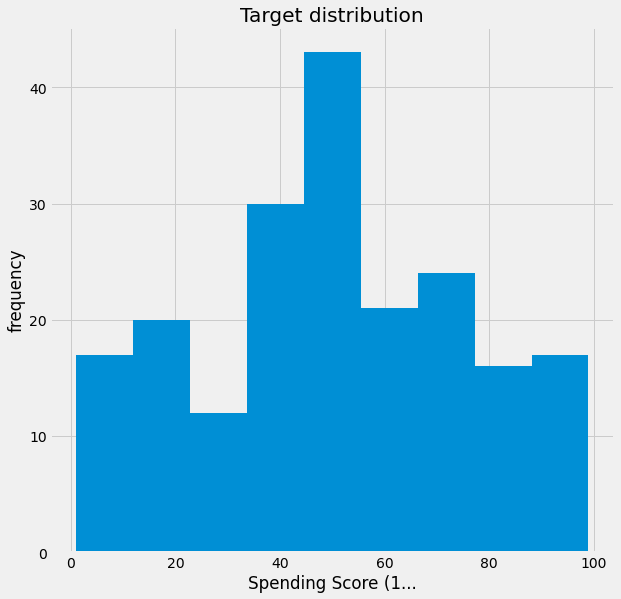

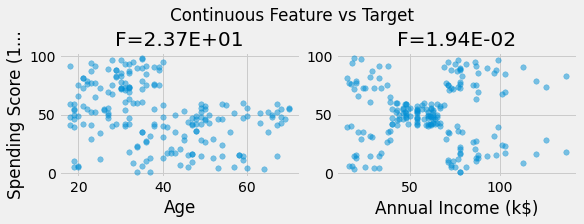

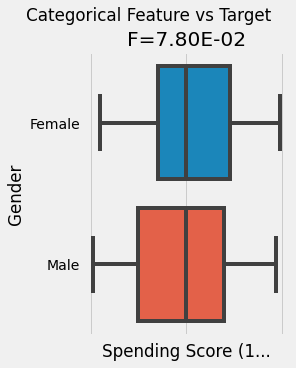

In [11]:
# Analyze data with respect to spending score:
dabl.plot(data, target_col = 'Spending Score (1-100)')

In [12]:

# Based on our finding above, lets select first Spending and Age Score for Clustering to see any strong clusters in the population


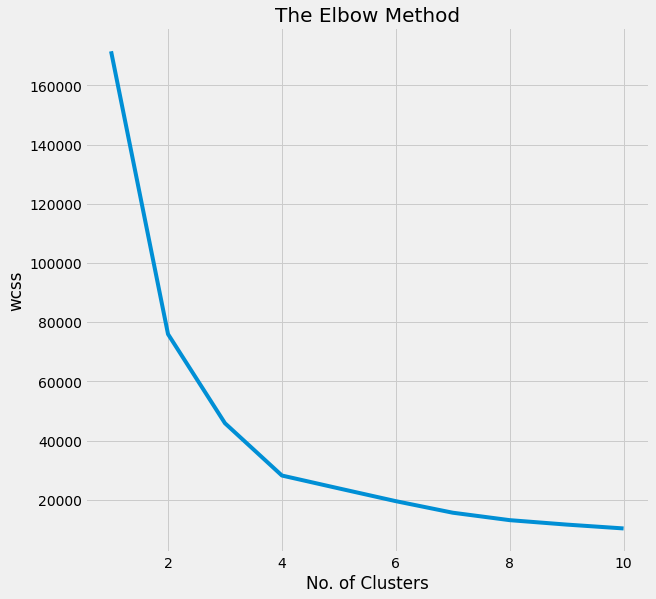

In [13]:
# clustering the Spending Score by Age group
from sklearn.cluster import KMeans
x2 = data.loc[:, ['Spending Score (1-100)', 'Age']].values

wcss_2 = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x2)
    wcss_2.append(km.inertia_)
    
plt.plot(range(1, 11), wcss_2)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

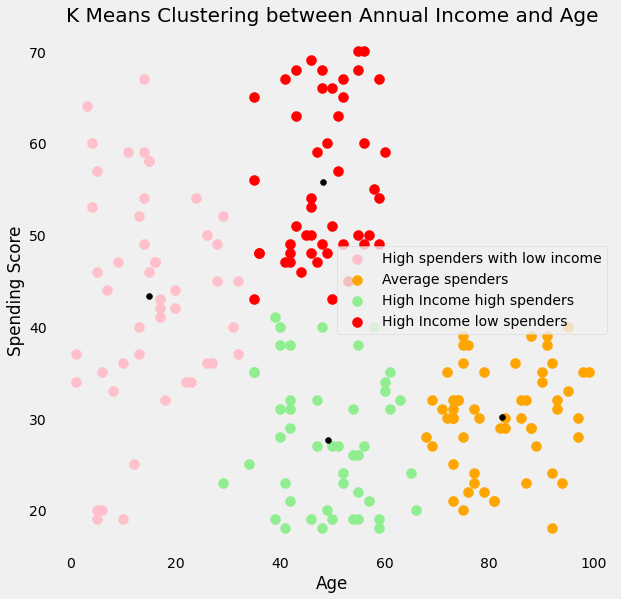

In [14]:
#Optimum number of Clusters is 4
#Now lets train the K-Means Clustering Model with 4 clusters
plt.style.use('fivethirtyeight')

km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x2)

plt.scatter(x2[y_means == 0,0], x2[y_means == 0,1], s = 100, c = 'pink', label = 'High spenders with low income')
plt.scatter(x2[y_means == 1,0], x2[y_means == 1,1], s = 100, c = 'orange', label = 'Average spenders')
plt.scatter(x2[y_means == 2,0], x2[y_means == 2,1], s = 100, c = 'lightgreen', label = 'High Income high spenders')
plt.scatter(x2[y_means == 3,0], x2[y_means == 3,1], s = 100, c = 'red', label = 'High Income low spenders')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c = 'black')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering between Spending Score and Age', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()


In [15]:
# Measures the separation distance between the Clusters , Closer to 1 is a good score
from sklearn.metrics import silhouette_score
Score2 = silhouette_score(x2, km.labels_, metric='euclidean', sample_size=None, random_state=None)

print("Silhoutte Score", Score2)

Silhoutte Score 0.49973941540141753


In [16]:

# Based on our finding above, lets select first Annual Income and Spending Score for Clustering to see any strong clusters in the population


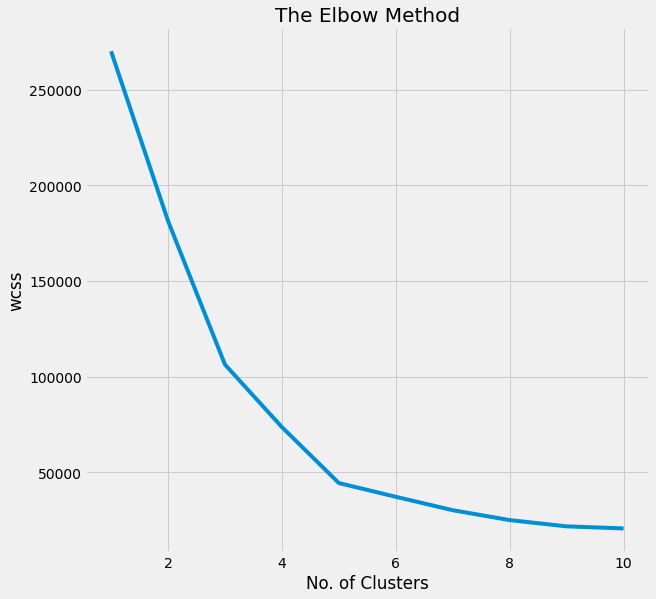

In [17]:
from sklearn.cluster import KMeans

x = data.loc[:, ['Spending Score (1-100)', 'Annual Income (k$)']].values
# Choosing the number of Clusters using elbow method to get the minimum WCSS value
wcss_1 = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss_1.append(km.inertia_)
    
plt.plot(range(1, 11), wcss_1)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()


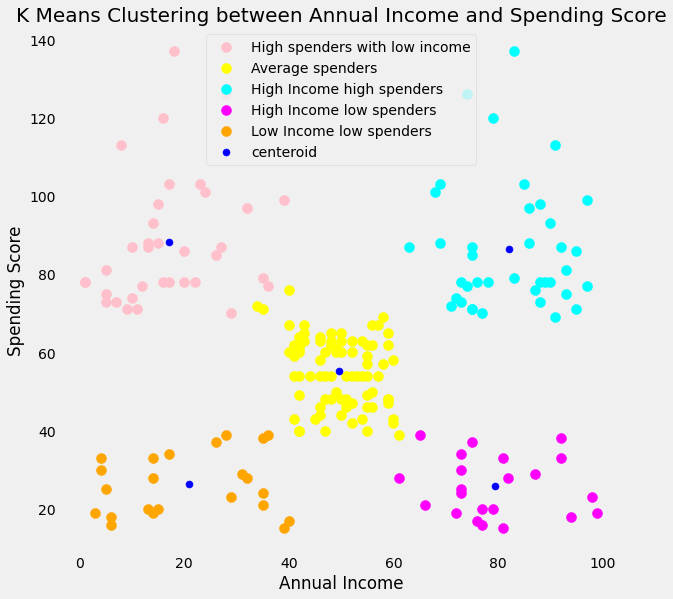

In [18]:
plt.style.use('fivethirtyeight')

km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0,0], x[y_means == 0,1], s = 100, c = 'pink', label = 'High spenders with low income')
plt.scatter(x[y_means == 1,0], x[y_means == 1,1], s = 100, c = 'yellow', label = 'Average spenders')
plt.scatter(x[y_means == 2,0], x[y_means == 2,1], s = 100, c = 'cyan', label = 'High Income high spenders')
plt.scatter(x[y_means == 3,0], x[y_means == 3,1], s = 100, c = 'magenta', label = 'High Income low spenders')
plt.scatter(x[y_means == 4,0], x[y_means == 4,1], s = 100, c = 'orange', label = 'Low Income low spenders')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 50, c = 'blue', label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering between Annual Income and Spending Score', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()


In [19]:
# Measures the separation distance between the Clusters , Closer to 1 is a good score
from sklearn.metrics import silhouette_score
Score = silhouette_score(x, km.labels_, metric='euclidean', sample_size=None, random_state=None)

print("Silhoutte Score", Score)

Silhoutte Score 0.553931997444648


In [20]:

# The Silhoutte score is higher than the first cluster suggesting that second model is better than the first model
# Based on the above two scenarios and considering the silhoutte score, we can market the customers based on the first clustering model (Score vs Income)